# 1. Veri Madenciliği Uygulaması ve Veri Seti Temini

sdlkfnldgdfgkndlkfdf 







In [61]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
df = pd.read_csv("students_adaptability_level_online_education.csv",sep=',',decimal='.')

In [63]:
df.rename(columns={'Gender':'Cinsiyet', 'Age':'Yaş', 'Education Level':'Eğitim', 'Institution Type':'Kurum Tipi', 'IT Student':'IT Öğrencisi', 'Location':'Konum', 'Load-shedding':'Elektrik Kesintisi', 'Financial Condition':'Ekonomik Durum', 'Internet Type':'Internet Tipi', 'Network Type':'Ağ Tipi', 'Class Duration':'Ders Süresi', 'Self Lms':'Tek Öğrenme', 'Device':'Cihaz', 'Adaptivity Level':'Adaptasyon Seviyesi'}, inplace=True)  

# 2. Modelleme


sdgdfgdfgdfgdfgdfgdfg




## 2.1. Araştırma Hedefini Belirlenmesi (Problem / Araştırma Sorusu)



## 2.2. Analizde Kullanılacak Verisetinin İncelenmesi Ve Veri Önişleme





In [64]:
df.head(8000)

,Cinsiyet,Yaş,Eğitim,Kurum Tipi,IT Öğrencisi,Konum,Elektrik Kesintisi,Ekonomik Durum,Internet Tipi,Ağ Tipi,Ders Süresi,Tek Öğrenme,Cihaz,Adaptasyon Seviyesi
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


self-lms olarak geçen ve tek öğrenme olarak çevirdiğimiz kısım verisetinin içeriğinde çok önemli olmadığı için çıkarıyoruz

In [65]:
df.drop('Tek Öğrenme', axis=1, inplace=True)

Grafik okurken kafa karıştırmaması için hedef sütunumuzdaki verileri türkçeleştirelim.

In [66]:
df["Adaptasyon Seviyesi"]= df["Adaptasyon Seviyesi"].replace("High","Yüksek") 
df["Adaptasyon Seviyesi"]= df["Adaptasyon Seviyesi"].replace("Moderate","Orta") 
df["Adaptasyon Seviyesi"]= df["Adaptasyon Seviyesi"].replace("Low","Düşük") 

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Cinsiyet             1205 non-null   object
 1   Yaş                  1205 non-null   object
 2   Eğitim               1205 non-null   object
 3   Kurum Tipi           1205 non-null   object
 4   IT Öğrencisi         1205 non-null   object
 5   Konum                1205 non-null   object
 6   Elektrik Kesintisi   1205 non-null   object
 7   Ekonomik Durum       1205 non-null   object
 8   Internet Tipi        1205 non-null   object
 9   Ağ Tipi              1205 non-null   object
 10  Ders Süresi          1205 non-null   object
 11  Cihaz                1205 non-null   object
 12  Adaptasyon Seviyesi  1205 non-null   object
dtypes: object(13)
memory usage: 122.5+ KB


In [68]:
df.describe()

,Cinsiyet,Yaş,Eğitim,Kurum Tipi,IT Öğrencisi,Konum,Elektrik Kesintisi,Ekonomik Durum,Internet Tipi,Ağ Tipi,Ders Süresi,Cihaz,Adaptasyon Seviyesi
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,Mobile,Orta
freq,663,374,530,823,901,935,1004,878,695,775,840,1013,625


adaptasyon seviyleri görselleştrildi

Orta      625
Düşük     480
Yüksek    100
Name: Adaptasyon Seviyesi, dtype: int64

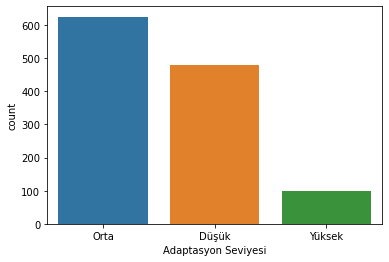

In [69]:
sns.countplot(x = "Adaptasyon Seviyesi", data = df)
df.loc[:, 'Adaptasyon Seviyesi'].value_counts()

Kayıp veri bulunmamaktadır

In [89]:
df.isnull().sum()

Cinsiyet               0
Yaş                    0
Eğitim                 0
Kurum Tipi             0
IT Öğrencisi           0
Konum                  0
Elektrik Kesintisi     0
Ekonomik Durum         0
Internet Tipi          0
Ağ Tipi                0
Ders Süresi            0
Cihaz                  0
Adaptasyon Seviyesi    0
dtype: int64

Veriler kategorik ve sayısal olarak sınıflandırılmıştır. Hedef değişkenimiz olan Adaptasyon seviyesi, kategorik alanlara dahil edilmeyecektir.

In [90]:
df.Cinsiyet=df.Cinsiyet.replace({'Boy':0, 'Girl':1})


df.head()

,Cinsiyet,Yaş,Eğitim,Kurum Tipi,IT Öğrencisi,Konum,Elektrik Kesintisi,Ekonomik Durum,Internet Tipi,Ağ Tipi,Ders Süresi,Cihaz,Adaptasyon Seviyesi
0,0,4,2,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,Tab,Orta
1,1,4,2,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Mobile,Orta
2,1,3,1,Government,No,Yes,Low,Mid,Wifi,4G,1-3,Mobile,Orta
3,1,2,0,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,Mobile,Orta
4,1,3,0,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,Mobile,Düşük


In [91]:
df.Yaş=df.Yaş.replace({'21-25':4, '16-20':3, '11-15':2, '26-30':5, '6-10':1, '1-5':0})
df.head()

,Cinsiyet,Yaş,Eğitim,Kurum Tipi,IT Öğrencisi,Konum,Elektrik Kesintisi,Ekonomik Durum,Internet Tipi,Ağ Tipi,Ders Süresi,Cihaz,Adaptasyon Seviyesi
0,0,4,2,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,Tab,Orta
1,1,4,2,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Mobile,Orta
2,1,3,1,Government,No,Yes,Low,Mid,Wifi,4G,1-3,Mobile,Orta
3,1,2,0,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,Mobile,Orta
4,1,3,0,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,Mobile,Düşük


In [92]:
df['Eğitim']=df['Eğitim'].replace({'University':2, 'College':1, 'School':0})
df.head()

,Cinsiyet,Yaş,Eğitim,Kurum Tipi,IT Öğrencisi,Konum,Elektrik Kesintisi,Ekonomik Durum,Internet Tipi,Ağ Tipi,Ders Süresi,Cihaz,Adaptasyon Seviyesi
0,0,4,2,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,Tab,Orta
1,1,4,2,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Mobile,Orta
2,1,3,1,Government,No,Yes,Low,Mid,Wifi,4G,1-3,Mobile,Orta
3,1,2,0,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,Mobile,Orta
4,1,3,0,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,Mobile,Düşük


In [93]:
Kategorik = df.select_dtypes(include='object').drop('Adaptasyon Seviyesi', axis=1).columns.tolist()
Sayısal = df.select_dtypes(exclude='object').columns.tolist()

In [94]:
for c in Kategorik:
    print('Column {} unique values: {}'.format(c, len(df[c].unique())))

Column Kurum Tipi unique values: 2
Column IT Öğrencisi unique values: 2
Column Konum unique values: 2
Column Elektrik Kesintisi unique values: 2
Column Ekonomik Durum unique values: 3
Column Internet Tipi unique values: 2
Column Ağ Tipi unique values: 3
Column Ders Süresi unique values: 3
Column Cihaz unique values: 3


Hedef değişkenin diğer değişkenlerle olan ilişkisi hakkında ön fikir sahibi olmak için kategorik ve sayısal verileri
grafikleştirelim.

Kategorik değişkenler kutu grafiği, sayısal değişkenler çizgi grafiği olarak görselleştirildi.

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABRA\anaconda3\lib\site-p

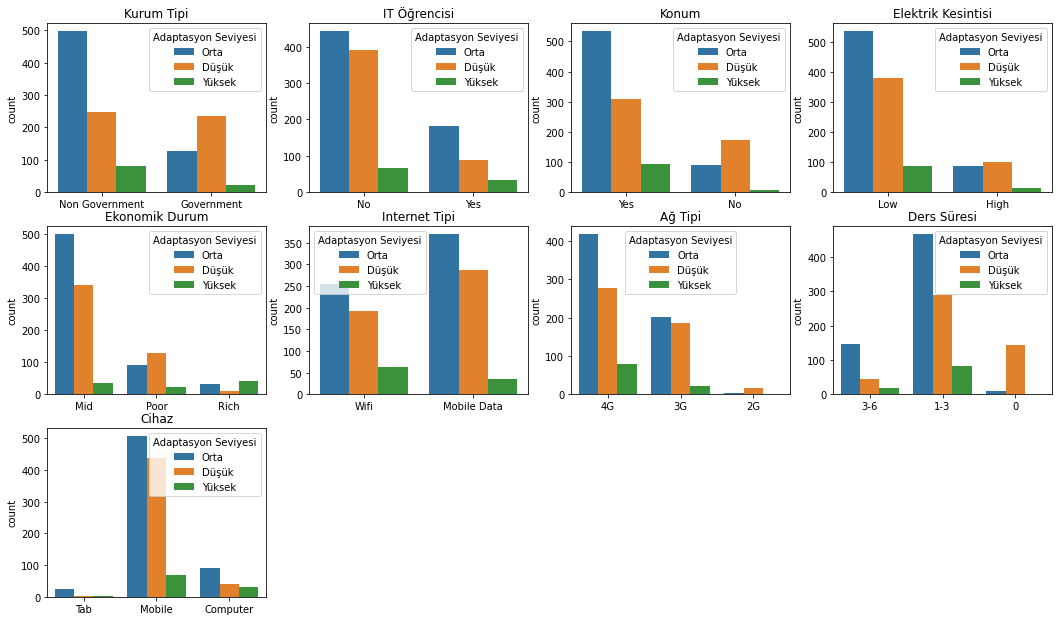

In [95]:
plt.figure(figsize=(18,18))
for i,c in enumerate(Kategorik):
    plt.subplot(5,4,i+1)
    sns.countplot(df[c], hue=df['Adaptasyon Seviyesi'])
    plt.title(c)
    plt.xlabel('')

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

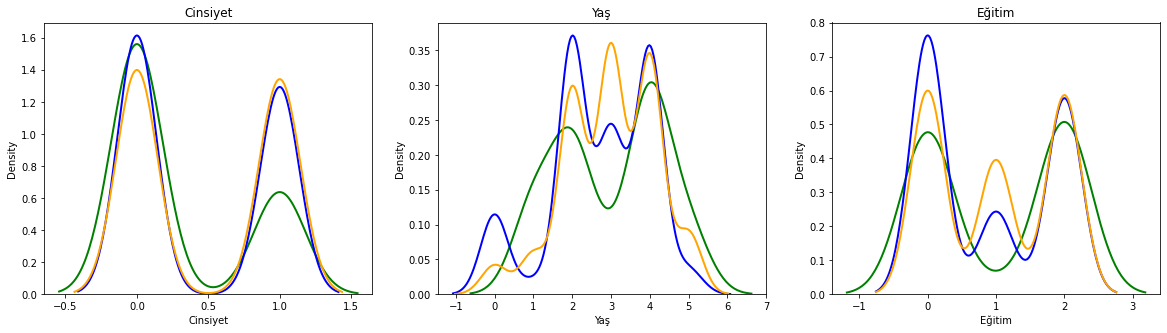

In [98]:
plt.figure(figsize=(20,5))
for i,c in enumerate(['Cinsiyet', 'Yaş', 'Eğitim']):
    plt.subplot(1,3,i+1)
    sns.distplot(df[df['Adaptasyon Seviyesi'] == 'Yüksek'][c], kde=True, color='green', hist=False, kde_kws=dict(linewidth=2), label='Yüksek')
    sns.distplot(df[df['Adaptasyon Seviyesi'] == 'Orta'][c], kde=True, color='blue', hist=False, kde_kws=dict(linewidth=2), label='Orta')
    sns.distplot(df[df['Adaptasyon Seviyesi'] == 'Düşük'][c], kde=True, color='orange', hist=False, kde_kws=dict(linewidth=2), label='Düşük')
    plt.title(c)

In [99]:
df.head(8000)

,Cinsiyet,Yaş,Eğitim,Kurum Tipi,IT Öğrencisi,Konum,Elektrik Kesintisi,Ekonomik Durum,Internet Tipi,Ağ Tipi,Ders Süresi,Cihaz,Adaptasyon Seviyesi
0,0,4,2,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,Tab,Orta
1,1,4,2,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Mobile,Orta
2,1,3,1,Government,No,Yes,Low,Mid,Wifi,4G,1-3,Mobile,Orta
3,1,2,0,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,Mobile,Orta
4,1,3,0,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,Mobile,Düşük
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,3,1,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,Mobile,Düşük
1201,1,3,1,Non Government,No,No,High,Mid,Wifi,4G,3-6,Mobile,Orta
1202,0,2,0,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,Mobile,Orta
1203,1,3,1,Non Government,No,No,Low,Mid,Wifi,4G,1-3,Mobile,Düşük


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Cinsiyet             1205 non-null   int64 
 1   Yaş                  1205 non-null   int64 
 2   Eğitim               1205 non-null   int64 
 3   Kurum Tipi           1205 non-null   object
 4   IT Öğrencisi         1205 non-null   object
 5   Konum                1205 non-null   object
 6   Elektrik Kesintisi   1205 non-null   object
 7   Ekonomik Durum       1205 non-null   object
 8   Internet Tipi        1205 non-null   object
 9   Ağ Tipi              1205 non-null   object
 10  Ders Süresi          1205 non-null   object
 11  Cihaz                1205 non-null   object
 12  Adaptasyon Seviyesi  1205 non-null   object
dtypes: int64(3), object(10)
memory usage: 122.5+ KB


<AxesSubplot:xlabel='Cinsiyet', ylabel='Adaptasyon Seviyesi'>

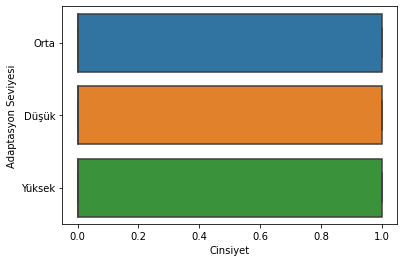

In [104]:
import seaborn as sns
sns.boxplot(x=df['Cinsiyet'],y=df['Adaptasyon Seviyesi'])

<AxesSubplot:xlabel='Yaş', ylabel='Adaptasyon Seviyesi'>

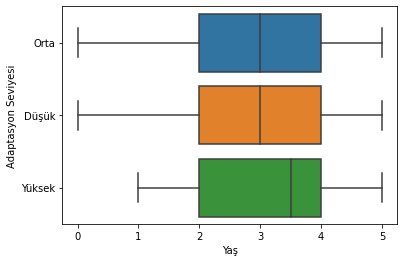

In [105]:
sns.boxplot(x=df['Yaş'],y=df['Adaptasyon Seviyesi'])

<AxesSubplot:xlabel='Eğitim', ylabel='Adaptasyon Seviyesi'>

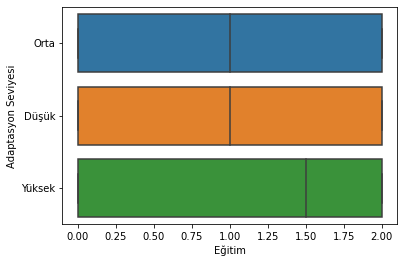

In [106]:
sns.boxplot(x=df['Eğitim'],y=df['Adaptasyon Seviyesi'])

# 3. Test ve Eğitim Verilerinin Hazırlanması 

Bu aşamada hedef değişkeni tanımlanan ve algoritma öncesi son halini alan verinin test ve eğitim olarak ikiye ayrılma işlemidir. Bu işlem için uygun olan ayırma eşiği 85-15 olarak uygun görülmüştür.

Genel bir gösterim olması amacıyla aşağıda bir test ve eğitim verilerinin ayrılması işlemlerini göstereceğim.Test algoritmalarını uygulamadan önce teste göre işlemler yaptıktan sonra bu adımlar uygulanacak

In [107]:
x = df.drop('Adaptasyon Seviyesi', axis = 1)              
y = df['Adaptasyon Seviyesi'] 

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.85, random_state = 400)

In [109]:
x_test.head(8000)

,Cinsiyet,Yaş,Eğitim,Kurum Tipi,IT Öğrencisi,Konum,Elektrik Kesintisi,Ekonomik Durum,Internet Tipi,Ağ Tipi,Ders Süresi,Cihaz
629,0,5,2,Government,No,Yes,Low,Mid,Wifi,4G,1-3,Mobile
510,1,3,0,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,Mobile
891,1,3,1,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,Computer
1072,0,2,0,Government,No,Yes,Low,Mid,Wifi,4G,1-3,Mobile
377,0,4,2,Government,Yes,Yes,Low,Mid,Mobile Data,3G,1-3,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...
524,0,4,2,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,Mobile
1145,0,3,1,Government,Yes,Yes,Low,Mid,Wifi,4G,1-3,Tab
63,0,2,0,Non Government,Yes,Yes,Low,Mid,Mobile Data,4G,1-3,Mobile
613,0,4,2,Government,No,No,High,Mid,Wifi,4G,0,Mobile


In [110]:
x_train.head(8000)

,Cinsiyet,Yaş,Eğitim,Kurum Tipi,IT Öğrencisi,Konum,Elektrik Kesintisi,Ekonomik Durum,Internet Tipi,Ağ Tipi,Ders Süresi,Cihaz
391,1,2,0,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,Mobile
1063,1,3,1,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,Computer
935,0,3,1,Government,Yes,Yes,Low,Mid,Wifi,4G,1-3,Tab
969,0,5,2,Government,Yes,No,Low,Poor,Mobile Data,4G,1-3,Mobile
625,0,2,0,Non Government,No,Yes,High,Mid,Wifi,4G,1-3,Computer
...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1,2,0,Non Government,Yes,Yes,Low,Mid,Mobile Data,3G,1-3,Mobile
140,1,2,0,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,Mobile
953,0,3,0,Government,No,Yes,Low,Mid,Wifi,4G,1-3,Mobile
318,1,3,1,Non Government,No,Yes,High,Mid,Wifi,4G,1-3,Mobile


In [111]:
y_test.head(8000)

629       Orta
510      Düşük
891       Orta
1072    Yüksek
377       Orta
         ...  
524      Düşük
1145      Orta
63        Orta
613      Düşük
137       Orta
Name: Adaptasyon Seviyesi, Length: 1025, dtype: object

In [112]:
y_train.head(8000)

391      Orta
1063     Orta
935      Orta
969      Orta
625     Düşük
        ...  
1011     Orta
140     Düşük
953      Orta
318     Düşük
348     Düşük
Name: Adaptasyon Seviyesi, Length: 180, dtype: object

# 4. Sınıflandırılma Algoritmalarının Uygulanması ve Performans Analizleri

Uygulamamızda dört sınıflandırma algoritması veriye uygulanacak ve performans çıktıları analiz edilecektir.Bu performans çıktıları ise 5.bölümde kıyaslanarak, kullanılacak olan sınıflandıma algoritması belirlenecektir.
Bu dört sınıflandırma algoritması;
Lojistik Regresyon
Naive Bayes
Karar Ağacı
K-NN(En Yakın Komşu)